# Exercício 2

Dada a função $f(x) = -1 -\frac{N}{19}$ $\forall$ $-\pi < x < 0$ e $f(x) = 1 + \frac{N}{19}$ $\forall$ $0 < x < \pi$ use o método da projeção para determinar as componentes desta função neste intervalo $-\pi < x < \pi$ na "base" composta pelas funções 1, $sen$ $kx$, $cos$ $kx$ com k = 1 até 5.  

## Resolução

Temos que $N = 0$, logo:

$$
f(x) = -1, \forall -\pi < x < 0
$$

e,

$$
f(x) = 1, \forall 0 < x < \pi
$$


In [4]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

def f(x):
    if type(x) == int:
        if x >= np.pi:
            return 1
        return -1

    y = []
    for i in x:
        if i >= 0:
            y.append(1)
        else:
            y.append(-1)
    return y

def proj(f, x, k):
    c = np.zeros(2 * k + 1)
    c[0] = np.trapz(f(x), x) / (2*np.pi)

    for i in range(1, k+1):
        c[i] = np.trapz(f(x) * np.sin(i*x), x) / np.pi
        c[k + i] = np.trapz(f(x) * np.cos(i*x), x) / np.pi
    
    return c

def approx(x, c, k):
    y = np.full_like(x, c[0]/2)

    for i in range(1, k+1):
        y += c[i] * np.sin(i*x) + c[k+i] * np.cos(i*x)

    return y

def plot(x, k):
    coef = proj(f, x, k)
    print('Coeficientes: ', coef)
    plt.plot(x, f(x), label='f')
    plt.plot(x, approx(x, coef, k), label='Aproximada')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Aproximação para k = {k}')
    plt.legend()

x = np.linspace(-np.pi, np.pi)

## Resultados

### k = 1

Coeficientes:  [7.06789929e-17 1.27280336e+00 1.23688238e-16]


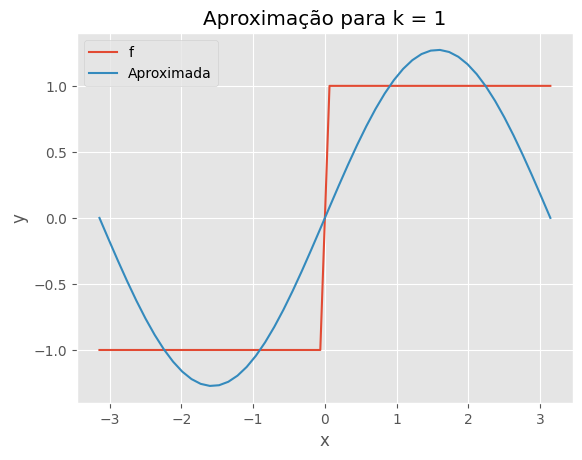

In [5]:
plot(x, 1)

### k = 2

Coeficientes:  [7.06789929e-17 1.27280336e+00 2.62049511e-03 1.23688238e-16
 1.14853363e-16]


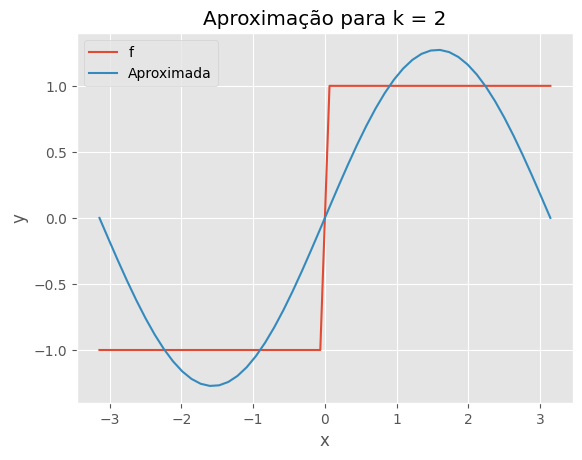

In [6]:
plot(x, 2)

### k = 3

Coeficientes:  [7.06789929e-17 1.27280336e+00 2.62049511e-03 4.23103922e-01
 1.23688238e-16 1.14853363e-16 1.76697482e-16]


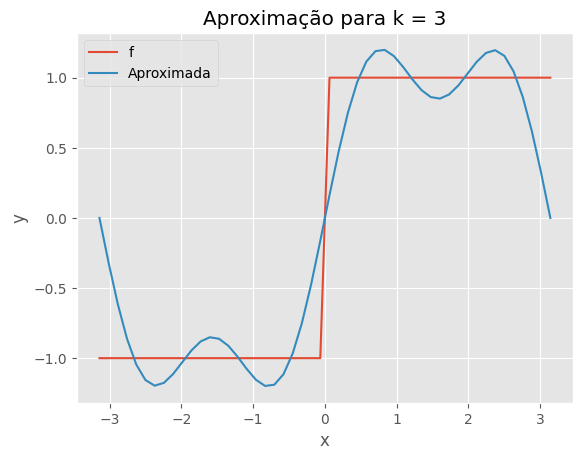

In [7]:
plot(x, 3)

### k = 4

Coeficientes:  [7.06789929e-17 1.27280336e+00 2.62049511e-03 4.23103922e-01
 5.26268254e-03 1.23688238e-16 1.14853363e-16 1.76697482e-16
 1.32523112e-16]


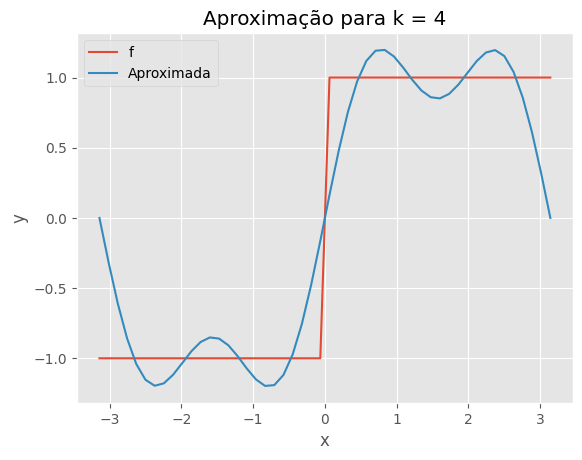

In [8]:
plot(x, 4)

### k = 5

Coeficientes:  [7.06789929e-17 1.27280336e+00 2.62049511e-03 4.23103922e-01
 5.26268254e-03 2.52463412e-01 1.23688238e-16 1.14853363e-16
 1.76697482e-16 1.32523112e-16 2.65046223e-16]


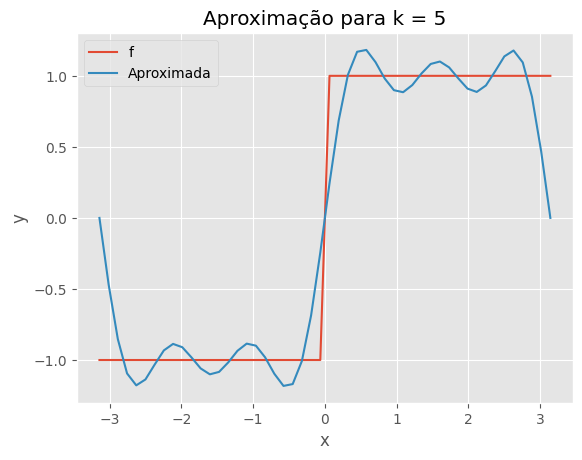

In [9]:
plot(x, 5)